# Week 1: Polynomial and Interaction Terms

This notebook explores the use of polynomial and interaction terms in modeling severity levels of cybersecurity attacks using the provided dataset.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("cybersecurity_attacks.csv")
df = df[df["Severity Level"].notna()]
severity_map = {"Low": 0, "Medium": 1, "High": 2, "Critical": 3}
df["Severity_Level_Num"] = df["Severity Level"].map(severity_map)

# Select features
features = ["Packet Length", "Anomaly Scores", "Source Port", "Destination Port"]
X_base = df[features]
y = df["Severity_Level_Num"]
X_base.describe()


,Packet Length,Anomaly Scores,Source Port,Destination Port
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,781.452725,50.113473,32970.356450,33150.868650
std,416.044192,28.853598,18560.425604,18574.668842
min,64.000000,0.000000,1027.000000,1024.000000
25%,420.000000,25.150000,16850.750000,17094.750000
50%,782.000000,50.345000,32856.000000,33004.500000
75%,1143.000000,75.030000,48928.250000,49287.000000
max,1500.000000,100.000000,65530.000000,65535.000000


In [2]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create polynomial and interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_base)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Get feature names
poly_feature_names = poly.get_feature_names_out(features)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.31      0.17      0.22      2673
           1       0.33      0.38      0.36      2729
           2       0.32      0.42      0.37      2598

    accuracy                           0.32      8000
   macro avg       0.32      0.33      0.31      8000
weighted avg       0.32      0.32      0.31      8000



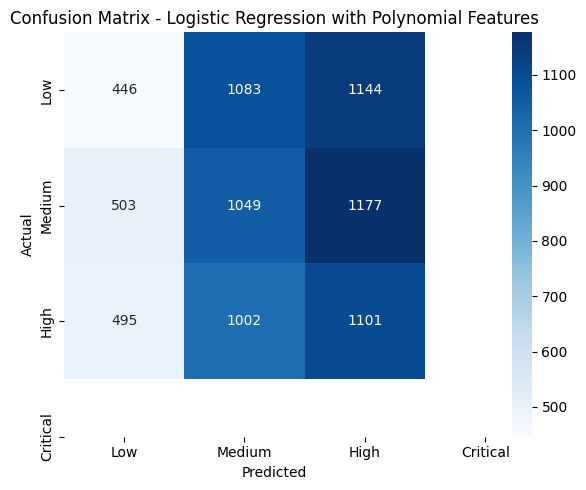

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=severity_map.keys(), yticklabels=severity_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression with Polynomial Features")
plt.tight_layout()
plt.show()
